In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [2]:
# Create 100 points following a function y=0.1 * x + 0.3 with some normal random distribution
num_points = 100
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

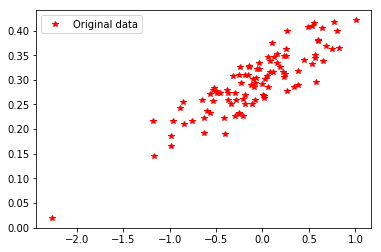

In [3]:
# Plot data
plt.plot(x_data, y_data, 'r*', label='Original data')
plt.legend()
plt.show()

In [8]:
# Create our linear regression model
# Variables resides internally inside the graph memory

#tf.name_scope organize things on the tensorboard graphview
with tf.name_scope("LinearReg") as scope:
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="Weights")
    b = tf.Variable(tf.zeros([1.0]), name="Bias")
    y = W * x_data + b

# Define a loss function that take into account the distance between
# the prediction and our dataset
with tf.name_scope("LossFunc") as scope:
    loss = tf.reduce_mean(tf.square(y-y_data))

# Create an optimizer for our loss function
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

#### Tensorboard stuff
# Annotate loss, weights and bias (Needed for tensorboard)
loss_summary = tf.summary.scalar("loss", loss)
w_h = tf.summary.histogram("W", W)
b_h = tf.summary.histogram("b", b)

# Merge all the summaries
merged_op = tf.summary.merge_all()

Step=0, loss=0.03144536167383194, [W=[ 0.44151083] b=[ 0.34661788]]
Step=1, loss=0.01720396801829338, [W=[ 0.35186929] b=[ 0.33238751]]
Step=2, loss=0.00962329562753439, [W=[ 0.28612044] b=[ 0.32469583]]
Step=3, loss=0.005584338679909706, [W=[ 0.23813164] b=[ 0.31905428]]
Step=4, loss=0.0034323970321565866, [W=[ 0.20310318] b=[ 0.31493658]]
Step=5, loss=0.002285848604515195, [W=[ 0.17753488] b=[ 0.31193098]]
Step=6, loss=0.0016749718924984336, [W=[ 0.15887183] b=[ 0.30973712]]
Step=7, loss=0.0013494986342266202, [W=[ 0.14524913] b=[ 0.30813572]]


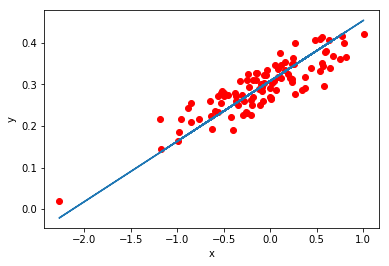

In [11]:
# Run session
# Initialize all graph variables
init = tf.initialize_all_variables()
# Create a session and initialize the graph variables (Will acutally run now...)
session = tf.Session()
session.run(init)

# Writer for tensorboard (Directory)
writer_tensorboard = tf.summary.FileWriter('./summaries', session.graph_def)

# Train on 8 steps
for step in range(8):
    # Optimize one step
    session.run(train)
    # Get access to graph variables(just read) with session.run(varName)    
    print("Step={}, loss={}, [W={} b={}]".format(step,session.run(loss),session.run(W),session.run(b)))
    # Add summary (Everytime could be to much....)
    result_summary = session.run(merged_op)    
    writer_tensorboard.add_summary(result_summary, step)

# Just plot the set of weights and bias with less loss (last)
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, session.run(W) * x_data + session.run(b))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Close the Session when we're done.
session.close()